#  Data Import and Cleaning

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\sayed\\OneDrive\\Documents\\Code institute\\Capstone\\Capstone\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\sayed\\OneDrive\\Documents\\Code institute\\Capstone\\Capstone'

# Loading Dataset

We will import the necessary libraries needed in this notebook

In [4]:
import pandas as pd
import numpy as np

Next we load the dataset

In [5]:
# Load the IEA energy values added CSV from the current directory
file_path = 'IEA_Energy_ValueAdded.csv'
df_raw = pd.read_csv(file_path)
print(df_raw.head())

  Country ISO3 Country  Year ISIC Division  \
0          NaN   ASEAN  2000         10-12   
1          NaN   ASEAN  2000         13-15   
2          NaN   ASEAN  2000            16   
3          NaN   ASEAN  2000         17-18   
4          NaN   ASEAN  2000            19   

                                  ISIC Division Desc         Measure  Method  \
0  Manufacture of food products, beverages and to...  Current prices  Source   
1  Manufacture of textiles, wearing apparel, leat...  Current prices  Source   
2  Manufacture of wood and of products of wood an...  Current prices  Source   
3         Manufacture of paper products and printing  Current prices  Source   
4  Manufacture of coke and refined petroleum prod...  Current prices  Source   

   Value LCU (million national currency)  Value USD (million USD)  
0                                    0.0                  27994.1  
1                                    0.0                  15065.1  
2                                    0

In [6]:
# Quick look at the data
df_raw.describe()

,Year,Value LCU (million national currency),Value USD (million USD)
count,27122.000000,2.704600e+04,2.704600e+04
mean,2009.790650,2.044190e+06,4.406982e+04
std,5.930976,1.931822e+07,1.830685e+05
min,2000.000000,-2.822300e+04,-1.390223e+04
25%,2005.000000,7.095000e+02,4.954400e+02
50%,2010.000000,6.212180e+03,2.374475e+03
75%,2015.000000,5.045835e+04,1.238149e+04
max,2021.000000,8.071376e+08,3.920983e+06


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27122 entries, 0 to 27121
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country ISO3                           24347 non-null  object 
 1   Country                                27122 non-null  object 
 2   Year                                   27122 non-null  int64  
 3   ISIC Division                          27122 non-null  object 
 4   ISIC Division Desc                     27122 non-null  object 
 5   Measure                                27122 non-null  object 
 6   Method                                 27122 non-null  object 
 7   Value LCU (million national currency)  27046 non-null  float64
 8   Value USD (million USD)                27046 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.9+ MB


Before cleaning the data, we will remove columns that aren't necessary for our analysis. Let check the "Measure" feature and see what it's about

In [8]:
unique_measures = df_raw['Measure'].unique()
print(unique_measures)

['Current prices' 'Constant 2015 prices']


In [9]:
current_prices_count = df_raw[df_raw['Measure'] == 'Current prices'].shape[0]
constant_prices_count = df_raw[df_raw['Measure'] == 'Constant 2015 prices'].shape[0]

print(f"Number of rows with 'Current prices': {current_prices_count}")
print(f"Number of rows with 'Constant 2015 prices': {constant_prices_count}")

Number of rows with 'Current prices': 17977
Number of rows with 'Constant 2015 prices': 9145


Doing some research, we learn that the "Constant prices" aim to remove the effect of inflation or deflation, allowing for a clearer picture of real economic growth. In our dataset the base is 2015, so the prices have been adjusted to reflect what the Goods and services would have been if prices had remained at 2015 levels. This is useful information so we will keep this feature   

In [10]:
unique_measures = df_raw['Method'].unique()
print(unique_measures)

['Source' 'Rebased']


'Source' indicates that the data was obtained directly from it's original source without any modification whilst rebased means it was calculated based on other datapoints. This is not useful information for our project so this column will be removed

In [11]:
unique_measures = df_raw['Country ISO3'].unique()
print(unique_measures)

[nan 'ARG' 'AUS' 'AUT' 'BEL' 'BRA' 'BRN' 'BGR' 'KHM' 'CAN' 'CHL' 'TWN'
 'COL' 'CRI' 'HRV' 'CYP' 'CZE' 'DNK' 'EST' 'FIN' 'FRA' 'DEU' 'GRC' 'HKG'
 'HUN' 'ISL' 'IND' 'IDN' 'IRL' 'ITA' 'JPN' 'KAZ' 'KOR' 'LAO' 'LVA' 'LTU'
 'LUX' 'MYS' 'MLT' 'MEX' 'MAR' 'MMR' 'NZL' 'MKD' 'NOR' 'CHN' 'PER' 'PHL'
 'POL' 'PRT' 'ROU' 'RUS' 'SAU' 'SRB' 'SGP' 'SVK' 'SVN' 'ZAF' 'ESP' 'SWE'
 'CHE' 'THA' 'NLD' 'TUN' 'TUR' 'GBR' 'USA' 'VNM']


Code apprevations for each country. We shall keep this feature. The NaN's are in the rows for ASEAN countries which is an intergovernmental orgasation (a group of countries). We don't need this data as those countries have their own rows so we shall remove it later. The ISIC Division is a quick way to see which industry we are referring to. As numbers it is confusing but as a feature it is useful so I will give each industry a code later

---

# Cleaning data

First lets remove the Method feature and ASEAN rows from the Countries Column

In [6]:
# Remove 'Measure' feature
df_raw2 = df_raw.drop(columns=['Method'])

# Drop rows that have 'ASEAN' in the 'Country' column
df_raw2 = df_raw2[df_raw2['Country'] != 'ASEAN']

print(df_raw2.head())

    Country ISO3    Country  Year ISIC Division  \
209          ARG  Argentina  2000         10-12   
210          ARG  Argentina  2000         13-15   
211          ARG  Argentina  2000            16   
212          ARG  Argentina  2000         17-18   
213          ARG  Argentina  2000            19   

                                    ISIC Division Desc         Measure  \
209  Manufacture of food products, beverages and to...  Current prices   
210  Manufacture of textiles, wearing apparel, leat...  Current prices   
211  Manufacture of wood and of products of wood an...  Current prices   
212         Manufacture of paper products and printing  Current prices   
213  Manufacture of coke and refined petroleum prod...  Current prices   

     Value LCU (million national currency)  Value USD (million USD)  
209                               16986.10                  16994.6  
210                                5944.13                   5947.1  
211                                155

### **Missing Values**

Next we'll check for any missing values

In [13]:
# Check for Missing Values
missing_values = df_raw2.isnull().sum()
print(missing_values)


Country ISO3                             2566
Country                                     0
Year                                        0
ISIC Division                               0
ISIC Division Desc                          0
Measure                                     0
Value LCU (million national currency)      76
Value USD (million USD)                    76
dtype: int64


In [14]:
missing_country_iso3 = df_raw2[df_raw2['Country ISO3'].isnull()]
print(missing_country_iso3)

      Country ISO3                            Country  Year ISIC Division  \
418            NaN  Asia-Pacific Economic Cooperation  2000         10-12   
419            NaN  Asia-Pacific Economic Cooperation  2000         13-15   
420            NaN  Asia-Pacific Economic Cooperation  2000            16   
421            NaN  Asia-Pacific Economic Cooperation  2000         17-18   
422            NaN  Asia-Pacific Economic Cooperation  2000            19   
...            ...                                ...   ...           ...   
27117          NaN                              World  2018            22   
27118          NaN                              World  2018            23   
27119          NaN                              World  2018            24   
27120          NaN                              World  2018         25-28   
27121          NaN                              World  2018         29-30   

                                      ISIC Division Desc         Measure  \

The missing values are in Asia Pacific corporation, which is missing an ISO3 code. We're intersted in countries not corporations so we can remove these rows. We will also remove the rows that have missing 'Value' entries

In [7]:
# Remove rows with missing values
df_cleaned = df_raw2.dropna()
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 24271 entries, 209 to 26912
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country ISO3                           24271 non-null  object 
 1   Country                                24271 non-null  object 
 2   Year                                   24271 non-null  int64  
 3   ISIC Division                          24271 non-null  object 
 4   ISIC Division Desc                     24271 non-null  object 
 5   Measure                                24271 non-null  object 
 6   Value LCU (million national currency)  24271 non-null  float64
 7   Value USD (million USD)                24271 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.7+ MB
None


In [16]:
# Check the values have been removed
missing_values = df_cleaned.isnull().sum()
print(missing_values)

Country ISO3                             0
Country                                  0
Year                                     0
ISIC Division                            0
ISIC Division Desc                       0
Measure                                  0
Value LCU (million national currency)    0
Value USD (million USD)                  0
dtype: int64


### **Duplicates**

Having removed the null values, lets check if there are any duplicated rows or any countries that appear under different names e.g 'UK' and 'Great Britain', or 'England' and 'UK'

In [17]:
# Check for duplicates
duplicates = df_cleaned.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


In [19]:
# Check for any countries that appear under different country codes or names
unique_country_codes = df_cleaned['Country ISO3'].unique()
unique_countries = df_cleaned['Country'].unique()

print("Unique Country Codes:", unique_country_codes)
print("Unique Countries:", unique_countries)

Unique Country Codes: ['ARG' 'AUS' 'AUT' 'BEL' 'BRA' 'BRN' 'BGR' 'KHM' 'CAN' 'CHL' 'TWN' 'COL'
 'CRI' 'HRV' 'CYP' 'CZE' 'DNK' 'EST' 'FIN' 'FRA' 'DEU' 'GRC' 'HKG' 'HUN'
 'ISL' 'IND' 'IDN' 'IRL' 'ITA' 'JPN' 'KAZ' 'KOR' 'LAO' 'LVA' 'LTU' 'LUX'
 'MYS' 'MLT' 'MEX' 'MAR' 'MMR' 'NZL' 'MKD' 'NOR' 'CHN' 'PER' 'PHL' 'POL'
 'PRT' 'ROU' 'RUS' 'SAU' 'SRB' 'SGP' 'SVK' 'SVN' 'ZAF' 'ESP' 'SWE' 'CHE'
 'THA' 'NLD' 'TUN' 'TUR' 'GBR' 'USA' 'VNM']
Unique Countries: ['Argentina' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Cambodia' 'Canada' 'Chile' 'Chinese Taipei' 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia'
 'Finland' 'France' 'Germany' 'Greece' 'Hong Kong' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Ireland' 'Italy' 'Japan' 'Kazakhstan' 'Korea' 'Laos'
 'Latvia' 'Lithuania' 'Luxembourg' 'Malaysia' 'Malta' 'Mexico' 'Morocco'
 'Myanmar' 'New Zealand' 'North Macedonia' 'Norway'
 "People's Republic of China" 'Peru' 'Philippines' 'Poland' 'Portuga

There are no duplicates or countries under different names

### **Outliers**

In [20]:
# Libraries needed for this section
import seaborn as sns
import matplotlib.pyplot as plt

We want to make a box plot for each country to see the distribution of value over the years and identify any potential outliers

In [21]:
# Number of unique countries
unique_code_count = df_cleaned['Country ISO3'].nunique()
print(f"Number of unique values in the 'Country Code' column: {unique_code_count}")

Number of unique values in the 'Country Code' column: 67


In [22]:
# Number of unique years
Unique_year_count = df_cleaned['Year'].nunique()
print(f"Number of unique values in the 'Year' column: {Unique_year_count}")

Number of unique values in the 'Year' column: 22


In [23]:
# Number of datapoints for each country
arg_count = df_cleaned[df_cleaned['Country ISO3'] == 'ARG'].shape[0]
print(f"Number of rows containing 'ARG': {arg_count}")

Number of rows containing 'ARG': 209


We have 68 countries, and each one has around 209 data points. Let do a quick box plot to see the distribution

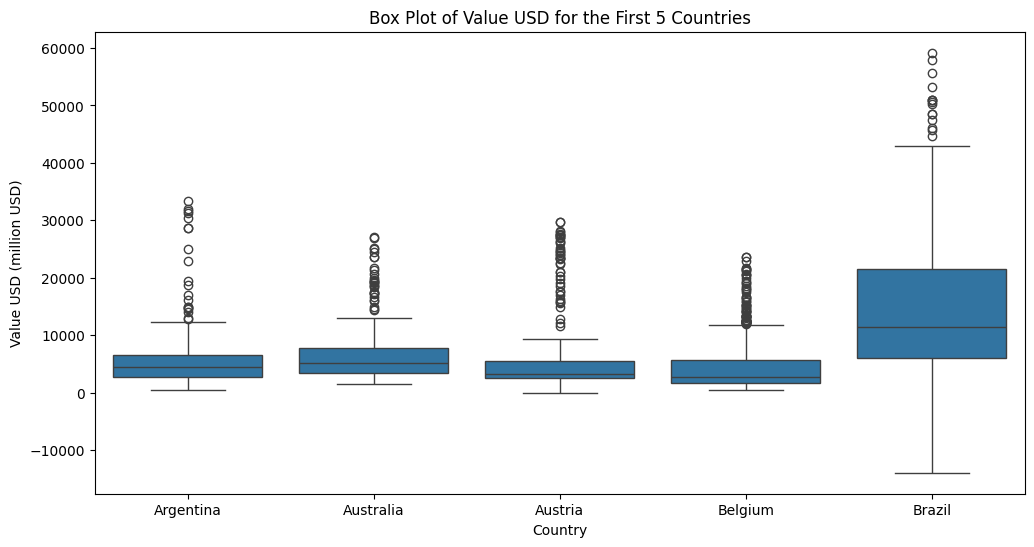

In [26]:
# Filter the dataframe for the first 5 countries
first_5_countries = df_cleaned[df_cleaned['Country ISO3'].isin(unique_country_codes[:5])]

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Value USD (million USD)', data=first_5_countries)
plt.title('Box Plot of Value USD for the First 5 Countries')
plt.xlabel('Country')
plt.ylabel('Value USD (million USD)')
plt.show()

Whilst it looks like there are a lot of outliers we need to remember that different industries can vary significantly in their value. It seems looking at these plots that there are some industries which have a much higher value than the rest. This is expected so we won't be dropping any further rows as all of the data we have at this point is vital and can be explained. A quick look at the bar chart below confirms this

C:\Users\sayed\AppData\Local\Temp\ipykernel_34404\2089949791.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Country ISO3', y='Value USD (million USD)', hue='ISIC Division', data=first_5_countries, ci=None)


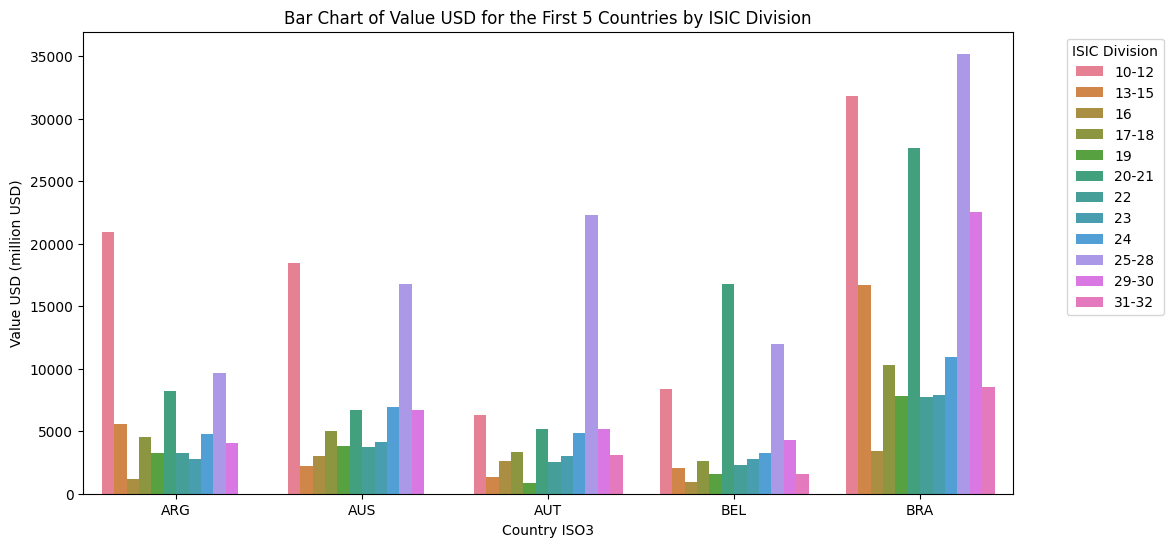

In [29]:
# Filter the dataframe for the first 5 countries
first_5_countries = df_cleaned[df_cleaned['Country ISO3'].isin(unique_country_codes[:5])]

# Create a bar chart without error bars
plt.figure(figsize=(12, 6))
sns.barplot(x='Country ISO3', y='Value USD (million USD)', hue='ISIC Division', data=first_5_countries, ci=None)
plt.title('Bar Chart of Value USD for the First 5 Countries by ISIC Division')
plt.xlabel('Country ISO3')
plt.ylabel('Value USD (million USD)')
plt.legend(title='ISIC Division', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Negative values

We noticed earlier that the 'Value' column had some negative values. This is fine in the context of our project as could indicate a few things: 

- A country is importing more than it is exporting
- A decline in that industry leading to losses i.e. negative growth
- Losses occured by foreign owned business in that industry. 

---

## GDP

To suppliment our data we will need the GDP for each country. This data was obtained from the Worldbank website and is readily available

In [93]:
# Load the GDP CSV from the current directory
gdp_file_path = 'GDP.csv'
gdp_pp = pd.read_csv(gdp_file_path)
print(gdp_pp.head(5))

         Data Source World Development Indicators         Unnamed: 2  \
0                NaN                          NaN                NaN   
1  Last Updated Date                   28/01/2025                NaN   
2                NaN                          NaN                NaN   
3       Country Name                 Country Code     Indicator Name   
4              Aruba                          ABW  GDP (current US$)   

       Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0             NaN         NaN         NaN         NaN         NaN         NaN   
1             NaN         NaN         NaN         NaN         NaN         NaN   
2             NaN         NaN         NaN         NaN         NaN         NaN   
3  Indicator Code      1960.0      1961.0      1962.0      1963.0      1964.0   
4  NY.GDP.MKTP.CD         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 9  ...   Unnamed: 58   Unnamed: 59   Unnamed: 60   Unnamed: 61  \
0 

In [94]:
# Drop rows with any null values
gdp_pp_cleaned = gdp_pp.dropna()
# Drop rows with any null values
gdp_pp_cleaned = gdp_pp.dropna()
print(gdp_pp_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 3 to 269
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Data Source                   150 non-null    object 
 1   World Development Indicators  150 non-null    object 
 2   Unnamed: 2                    150 non-null    object 
 3   Unnamed: 3                    150 non-null    object 
 4   Unnamed: 4                    150 non-null    float64
 5   Unnamed: 5                    150 non-null    float64
 6   Unnamed: 6                    150 non-null    float64
 7   Unnamed: 7                    150 non-null    float64
 8   Unnamed: 8                    150 non-null    float64
 9   Unnamed: 9                    150 non-null    float64
 10  Unnamed: 10                   150 non-null    float64
 11  Unnamed: 11                   150 non-null    float64
 12  Unnamed: 12                   150 non-null    float64
 13  Unnamed: 1

In [95]:
# Drop the first row and set the second row as the column names
gdp_pp_cleaned.columns = gdp_pp_cleaned.iloc[0]
gdp_pp_cleaned = gdp_pp_cleaned[1:]

# Reset the index
gdp_pp_cleaned.reset_index(drop=True, inplace=True)

# Drop column 3 and 4
gdp_pp_cleaned.drop(columns=['Indicator Name', 'Indicator Code'], inplace=True)

#change column 3:end to 1960:2023
gdp_pp_cleaned.columns = gdp_pp_cleaned.columns[:2].tolist() + list(range(1960, 2024)) 

# Print the updated column names
print("\nUpdated column names:")
print(gdp_pp_cleaned.columns)



Updated column names:
Index(['Country Name', 'Country Code',           1960,           1961,
                 1962,           1963,           1964,           1965,
                 1966,           1967,           1968,           1969,
                 1970,           1971,           1972,           1973,
                 1974,           1975,           1976,           1977,
                 1978,           1979,           1980,           1981,
                 1982,           1983,           1984,           1985,
                 1986,           1987,           1988,           1989,
                 1990,           1991,           1992,           1993,
                 1994,           1995,           1996,           1997,
                 1998,           1999,           2000,           2001,
                 2002,           2003,           2004,           2005,
                 2006,           2007,           2008,           2009,
                 2010,           2011,           2012,

In [96]:
# Rename the columns
gdp_pp_cleaned.rename(columns={'Country Name': 'Country', 'Country Code': 'ISO3'}, inplace=True)
print(gdp_pp_cleaned.columns)

Index(['Country',    'ISO3',      1960,      1961,      1962,      1963,
            1964,      1965,      1966,      1967,      1968,      1969,
            1970,      1971,      1972,      1973,      1974,      1975,
            1976,      1977,      1978,      1979,      1980,      1981,
            1982,      1983,      1984,      1985,      1986,      1987,
            1988,      1989,      1990,      1991,      1992,      1993,
            1994,      1995,      1996,      1997,      1998,      1999,
            2000,      2001,      2002,      2003,      2004,      2005,
            2006,      2007,      2008,      2009,      2010,      2011,
            2012,      2013,      2014,      2015,      2016,      2017,
            2018,      2019,      2020,      2021,      2022,      2023],
      dtype='object')


In [97]:
# Remove columns 3 to 43
gdp_pp_cleaned.drop(gdp_pp_cleaned.columns[2:41], axis=1, inplace=True)

# Remove last 2 columns
gdp_pp_cleaned.drop(gdp_pp_cleaned.columns[-2:], axis=1, inplace=True)

print(gdp_pp_cleaned.columns)

Index(['Country',    'ISO3',      1999,      2000,      2001,      2002,
            2003,      2004,      2005,      2006,      2007,      2008,
            2009,      2010,      2011,      2012,      2013,      2014,
            2015,      2016,      2017,      2018,      2019,      2020,
            2021],
      dtype='object')


In our original dataset, China is named as 'Republic of China', so we need to change this so our datasets match

In [98]:
df_cleaned['Country'] = df_cleaned['Country'].replace("People's Republic of China", 'China')
df_cleaned['Country'] = df_cleaned['Country'].replace('The Netherlands', 'Netherlands')
print(df_cleaned[df_cleaned['Country'] == 'China'].head(1))
print(df_cleaned[df_cleaned['Country'] == 'Netherlands'].head(1))

      Country ISO3 Country  Year ISIC Division  \
18549          CHN   China  2000         10-12   

                                      ISIC Division Desc         Measure  \
18549  Manufacture of food products, beverages and to...  Current prices   

       Value LCU (million national currency)  Value USD (million USD)  
18549                              421389.72                  50901.7  
      Country ISO3      Country  Year ISIC Division  \
24774          NLD  Netherlands  2000         10-12   

                                      ISIC Division Desc         Measure  \
24774  Manufacture of food products, beverages and to...  Current prices   

       Value LCU (million national currency)  Value USD (million USD)  
24774                                10294.0                  9507.67  


C:\Users\sayed\AppData\Local\Temp\ipykernel_39900\3484883670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Country'] = df_cleaned['Country'].replace("People's Republic of China", 'China')
C:\Users\sayed\AppData\Local\Temp\ipykernel_39900\3484883670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Country'] = df_cleaned['Country'].replace('The Netherlands', 'Netherlands')


In [99]:
# Divide the numbered columns by 1,000,000
gdp_pp_cleaned.iloc[:, 2:] = gdp_pp_cleaned.iloc[:, 2:].div(1_000_000)
print(gdp_pp_cleaned.head())

                       Country ISO3           1999           2000  \
0  Africa Eastern and Southern  AFE  265429.000000  287202.000000   
1   Africa Western and Central  AFW  139468.000000  142140.000000   
2                    Australia  AUS  389652.000000  416168.000000   
3                      Austria  AUT  216422.000000  196182.000000   
4                      Burundi  BDI     808.077223     870.486066   

            2001           2002           2003           2004          2005  \
0  260992.000000  267815.000000  355716.000000  442696.000000  516661.00000   
1  150058.000000  179390.000000  207755.000000  256908.000000  313328.00000   
2  379629.000000  395789.000000  467739.000000  614660.000000  695693.00000   
3  196477.000000  212837.000000  260780.000000  299210.000000  313952.00000   
4     876.794723     825.394519     784.654424     915.257323    1117.11308   

            2006  ...          2012          2013          2014          2015  \
0  580241.000000  ...  9.5299

In [100]:
# Change gdp_pp_cleaned to gdp_cleaned
gdp_cleaned = gdp_pp_cleaned
print(gdp_cleaned.head(1)) 

                       Country ISO3      1999      2000      2001      2002  \
0  Africa Eastern and Southern  AFE  265429.0  287202.0  260992.0  267815.0   

       2003      2004      2005      2006  ...      2012      2013      2014  \
0  355716.0  442696.0  516661.0  580241.0  ...  952999.0  962395.0  978708.0   

       2015      2016      2017       2018       2019      2020       2021  
0  898278.0  828943.0  972999.0  1012310.0  1009720.0  933392.0  1085750.0  

[1 rows x 25 columns]


### Exporting

In [101]:
# Export the cleaned data to a new CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)
print("Data exported successfully to cleaned_data.csv")

# Export gdp_cleaned to a new CSV file
gdp_cleaned.to_csv('gdp_cleaned.csv', index=False)
print("Data exported successfully to gdp_cleaned.csv")

Data exported successfully to cleaned_data.csv
Data exported successfully to gdp_cleaned.csv


---